# K-Nearest Neighbors Algorithm


In this Jupyter Notebook we will focus on $KNN-Algorithm$. KNN is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it.

An algorithm, looking at one point on a grid, trying to determine if a point is in group A or B, looks at the states of the points that are near it. The range is arbitrarily determined, but the point is to take a sample of the data. If the majority of the points are in group A, then it is likely that the data point in question will be A rather than B, and vice versa.
<br>

<img src="knn/example 1.png"  height="30%" width="30%">


In [2]:
%pip install tqdm

     |████████████████████████████████| 74 kB 1.2 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


# Imports

In [1]:
import numpy as np
from tqdm import tqdm_notebook

# How it works?

We have some labeled data set $X-train$, and a new set $X$ that we want to classify based on previous classyfications



## Seps

### 1. Calculate distance to all neightbours
### 2. Sort neightbours (based on closest distance)
### 3. Count possibilities of each class for k nearest neighbours 
### 4. The class with highest possibilty is Your prediction

# 1. Calculate distance to all neighbours

Depending on the problem You should use diffrent type of count distance method.
<br>
For example we can use Euclidean distance. Euclidean distance is the "ordinary" straight-line distance between two points in D-Dimensional space

#### Definiton
$d(p, q) = d(q, p) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + \dots + (q_D - p_D)^2} = \sum_{d=1}^{D} (p_d - q_d)^2$

#### Example
Distance in $R^2$
<img src="knn/euklidean_example.png"  height="30%" width="30%">


$p = (4,6)$
<br>
$q = (1,2)$
<br>
$d(p, q) = \sqrt{(1-4)^2 + (2-6)^2} =\sqrt{9 + 16} = \sqrt{25} = 5 $



## Code

In [2]:
def get_euclidean_distance(A_matrix, B_matrix):
    """
    Function computes euclidean distance between matrix A and B
    Args:
        A_matrix (numpy.ndarray): Matrix size N1:D
        B_matrix (numpy.ndarray): Matrix size N2:D

    Returns:
        numpy.ndarray: Matrix size N1:N2
    """

    A_square = np.reshape(np.sum(A_matrix * A_matrix, axis=1), (A_matrix.shape[0], 1))
    B_square = np.reshape(np.sum(B_matrix * B_matrix, axis=1), (1, B_matrix.shape[0]))
    AB = A_matrix @ B_matrix.T

    C = -2 * AB + B_square + A_square

    return np.sqrt(C)

## Example Usage

In [3]:
X = np.array([[1,2,3] , [-4,5,-6]])

X_train = np.array([[0,0,0], [1,2,3], [4,5,6], [-4, 4, -6]])

print("X: {} Exaples in {} Dimensional space".format(*X.shape))
print("X_train: {} Exaples in {} Dimensional space".format(*X_train.shape))


print()

print("X:")
print(X)

print()

print("X_train")
print(X_train)


X: 2 Exaples in 3 Dimensional space
X_train: 4 Exaples in 3 Dimensional space

X:
[[ 1  2  3]
 [-4  5 -6]]

X_train
[[ 0  0  0]
 [ 1  2  3]
 [ 4  5  6]
 [-4  4 -6]]


In [4]:
distance_matrix = get_euclidean_distance(X, X_train)

print("Distance Matrix shape: {}".format(distance_matrix.shape))
print("Distance between first example from X and first form X_train {}".format(distance_matrix[0,0]))
print("Distance between first example from X and second form X_train {}".format(distance_matrix[0,1]))
print("Distance between first example from X and second form X_train {}".format(distance_matrix[0,2]))
print("Distance between first example from X and second form X_train {}".format(distance_matrix[0,3]))

Distance Matrix shape: (2, 4)
Distance between first example from X and first form X_train 3.7416573867739413
Distance between first example from X and second form X_train 0.0
Distance between first example from X and second form X_train 5.196152422706632
Distance between first example from X and second form X_train 10.488088481701515


In [5]:
distance_matrix

array([[ 3.74165739,  0.        ,  5.19615242, 10.48808848],
       [ 8.77496439, 10.72380529, 14.4222051 ,  1.        ]])

# 2. Sort neightbours

In order to find best fitting class for our observations we need to find to which classes belong observation neightbours and then to sort classes based on the closest distance


## Code

In [6]:
def get_sorted_train_labels(distance_matrix, y):
    """
    Function sorts y labels, based on probabilities from distances matrix
    Args:
        distance_matrix (numpy.ndarray): Distance Matrix, between points from X and X_train, size: N1:N2
        y (numpy.ndarray): vector of classes of X points, size: N1

    Returns:
        numpy.ndarray: labels matrix sorted according to distances to nearest neightours, size N1:N2 

    """
    order = distance_matrix.argsort(kind='mergesort')

    return np.squeeze(y[order])


## Example Usage

In [7]:
y_train = np.array([[1, 1, 2, 3]]).T


In [8]:
y_train

array([[1],
       [1],
       [2],
       [3]])

In [9]:
X_train


array([[ 0,  0,  0],
       [ 1,  2,  3],
       [ 4,  5,  6],
       [-4,  4, -6]])

In [10]:

print("Labels array {} Examples in {} Dimensional Space".format(*y_train.shape))

print("Distance matrix shape {}".format(distance_matrix.shape))

sorted_train_labels = get_sorted_train_labels(distance_matrix, y_train)

print("Sorted train labels {} shape".format(sorted_train_labels.shape))
print("Closest 3 classes for first element from set X: {}".format(sorted_train_labels[0, :3]))

Labels array 4 Examples in 1 Dimensional Space
Distance matrix shape (2, 4)
Sorted train labels (2, 4) shape
Closest 3 classes for first element from set X: [1 1 2]


# 3. Count possibilities of each class for k nearest neighbours 

In order to find best class for our observation $x$ we need to calculate the probability of belonging to each class. In our case it is quite easy. We need just to count how many from k-nearest-neighbours of observation $x$ belong to each class and then devide it by k 
<br><br>
$p(y=class \space| x)  = \frac{\sum_{1}^{k}(1 \space if \space N_i = class, \space else \space 0) }{k}$ Where $N_i$ is $i$ nearest neightbour



## Code

In [11]:
def get_p_y_x_using_knn(y, k):
    """
    The function determines the probability distribution p (y | x)
    for each of the labels for objects from the X
    using the KNN classification learned on the X_train

    Args:
        y (numpy.ndarray): Sorted matrix of N2 nearest neighbours labels, size N1:N2
        k (int): number of nearest neighbours for KNN algorithm

    Returns: numpy.ndarray: Matrix of probabilities for N1 points (from set X) of belonging to each class,
    size N1:C (where C is number of classes)
    """

    first_k_neighbors = y[:, :k]
    
    N1, N2 = y.shape
    classes = np.unique(y)
    number_of_classes = classes.shape[0]

    probabilities_matrix = np.zeros(shape=(N1, number_of_classes))

    for i, row in enumerate(first_k_neighbors):
        for j, value in enumerate(classes):
            probabilities_matrix[i][j] = list(row).count(value) / k

    return probabilities_matrix


## Example usage

In [12]:
print("Sorted train labels:")
print(sorted_train_labels)

probabilities_matrix = get_p_y_x_using_knn(y=sorted_train_labels, k=4)



print("Probability fisrt element belongs to 1-st class: {:2f}".format(probabilities_matrix[1,0]))
print("Probability fisrt element belongs to 3-rd class: {:2f}".format(probabilities_matrix[1,2]))



Sorted train labels:
[[1 1 2 3]
 [3 1 1 2]]
Probability fisrt element belongs to 1-st class: 0.500000
Probability fisrt element belongs to 3-rd class: 0.250000


# 4. The class with highest possibilty is Your prediction

At the end we combine all previous steps to get prediction

## Code

In [13]:
def predict(X, X_train, y_train, k, distance_function):
    """
    Function returns predictions for new set X based on labels of points from X_train
    Args:
        X (numpy.ndarray): set of observations (points) that we want to label
        X_train (numpy.ndarray): set of lalabeld bservations (points)
        y_train (numpy.ndarray): labels for X_train
        k (int): number of nearest neighbours for KNN algorithm

    Returns:
        (numpy.ndarray): label predictions for points from set X
    """
    distance_matrix = distance_function(X, X_train)

    sorted_labels = get_sorted_train_labels(distance_matrix=distance_matrix, y=y_train)
    
    p_y_x = get_p_y_x_using_knn(y=sorted_labels, k=k)

    number_of_classes = p_y_x.shape[1]
    reversed_rows = np.fliplr(p_y_x)

    prediction = number_of_classes - (np.argmax(reversed_rows, axis=1) + 1)

    return prediction

## Example usage

In [14]:
prediction = predict(X, X_train, y_train, 3, get_euclidean_distance)

print("Predicted propabilities of classes for for first observation", probabilities_matrix[0])
print("Predicted class for for first observation", prediction[0])

print()

print("Predicted propabilities of classes for for second observation", probabilities_matrix[1])
print("Predicted class for for second observation", prediction[1])

Predicted propabilities of classes for for first observation [0.5  0.25 0.25]
Predicted class for for first observation 0

Predicted propabilities of classes for for second observation [0.5  0.25 0.25]
Predicted class for for second observation 0


# Accuracy

To find how good our knn model works we should count accuracy

## Code

In [15]:
def count_accuracy(prediction, y_true):
    """
    Returns:
        float: Predictions accuracy

    """
    N1 = prediction.shape[0]
    
    accuracy = np.sum(prediction == y_true) / N1

    return accuracy

## Example usage

In [16]:
y_true = np.array([[0, 2]])

predicton = predict(X, X_train, y_train, 3, get_euclidean_distance)


print("True classes:{}, accuracy {}%".format(y_true, count_accuracy(predicton, y_true)  * 100))

True classes:[[0 2]], accuracy 50.0%


# Find best k

Best k parameter is that one for which we have highest accuracy

## Code

In [17]:
def select_knn_model(X_validation, y_validation, X_train, y_train, k_values, distance_function):
    """
    Function returns k parameter that best fit Xval points
    Args:
        Xval (numpy.ndarray): set of Validation Data, size N1:D
        Xtrain (numpy.ndarray): set of Training Data, size N2:D
        yval (numpy.ndarray): set of labels for Validation data, size N1:1
        ytrain (numpy.ndarray): set of labels for Training Data, size N2:1
        k_values (list): list of int values of k parameter that should be checked

    Returns:
        int: k paprameter that best fit validation set
    """

    accuracies = []

    for k in tqdm_notebook(k_values):
        prediction = predict(X_validation, X_train, y_train, k, distance_function)

        accuracy = count_accuracy(prediction, y_validation)
        accuracies.append(accuracy)

    best_k = k_values[accuracies.index(max(accuracies))]

    return best_k, accuracies


# Real World Example - Iris Dataset


<img src="knn/iris_example1.jpeg"  height="60%" width="60%">


This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Each example contains 4 attributes
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

Predicted attribute: class of iris plant. 

<img src="knn/iris_example2.png"  height="70%" width="70%">






In [18]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

iris_X = iris.data
iris_y = iris.target

print("Iris: {} examples in {} dimensional space".format(*iris_X.shape))
print("First example in dataset :\n Speal lenght: {}cm \n Speal width: {}cm \n Petal length: {}cm \n Petal width: {}cm".format(*iris_X[0]))

print("Avalible classes", np.unique(iris_y))

Iris: 150 examples in 4 dimensional space
First example in dataset :
 Speal lenght: 5.1cm 
 Speal width: 3.5cm 
 Petal length: 1.4cm 
 Petal width: 0.2cm
Avalible classes [0 1 2]


## Prepare Data

In our data set we have 150 examples (50 examples of each class), we have to divide it into 3 datasets.
1. Training data set, 90 examples. It will be used to find  k - nearest neightbours
2. Validation data set, 30 examples. It will be used to find best k parameter, the one for which accuracy is highest
3. Test data set, 30 examples. It will be used to check how good our model performs

Data has to be shuffled (mixed in random order), because originally it is stored 50 examples of class 0, 50 of 1 and 50 of 2.


In [19]:
from sklearn.utils import shuffle

iris_X, iris_y = shuffle(iris_X, iris_y, random_state=1)


test_size = 30
validation_size = 30
training_size = 90

X_test = iris_X[:test_size]
X_validation = iris_X[test_size: (test_size+validation_size)]
X_train = iris_X[(test_size+validation_size):]

y_test = iris_y[:test_size]
y_validation = iris_y[test_size: (test_size+validation_size)]
y_train = iris_y[(test_size+validation_size):]

## Find best k parameter

In [20]:
import tqdm

<ipython-input-17-8de028d3b491>:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm_notebook(k_values):


  0%|          | 0/47 [00:00<?, ?it/s]

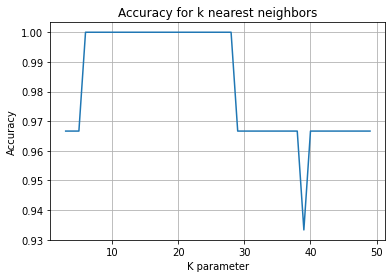

In [21]:
import tqdm
k_values = [i for i in range(3,50)]

best_k, accuracies = select_knn_model(X_validation, y_validation, X_train, y_train, k_values, distance_function=get_euclidean_distance)

plt.plot(k_values, accuracies)
plt.xlabel('K parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy for k nearest neighbors')
plt.grid()
plt.show()


## Count accuracy for training set

In [22]:
prediction = predict(X_test, X_train, y_train, best_k, get_euclidean_distance)

accuracy = count_accuracy(prediction, y_test)

print("Accuracy for best k={}: {:2f}%".format(best_k, accuracy*100))


Accuracy for best k=6: 96.666667%


# Real World Example - Mnist Dataset

Mnist is a popular database of handwritten images created for people who are new to machine learning. There are many courses on the internet that include classification problem using MNIST dataset.

This dataset contains 55000 images and labels. Each image is 28x28 pixels large, but for the purpose of the classification task they are flattened to 784x1 arrays $(28 \cdot 28 = 784)$. Summing up our training set is a matrix of size $[50000, 784]$  = [amount of images, size of image]. We will split it into 40000 training examples and 10000 validation examples to choose a best k


It also contains 5000 test images and labels, but for test we will use only 1000 (due to time limitations, using 5k would take 5x as much time) 


<h3>Mnist Data Example</h3>
<img src="knn/mnist_example.jpg" height="70%" width="70%">

Now we are going to download this dataset and split it into test and train sets.

In [26]:
# Download the data from https://www.kaggle.com/pablotab/mnistpklgz and put it in the same folder.
import utils
import cv2

training_size = 49000
validation_size = 1000
test_size = 1000

train_data, test = utils.get_mnist_dataset()

train_images, train_labels = train_data
test_images, test_labels = test

validation_images = train_images[training_size:training_size + validation_size]
train_images = train_images[:training_size]

validation_labels = train_labels[training_size:training_size + validation_size]
train_labels = train_labels[:training_size]

test_images = test_images[:test_size]
test_labels = test_labels[:test_size]


print("Training images matrix size: {}".format(train_images.shape))
print("Training labels matrix size: {}".format(train_labels.shape))

print("Validation images matrix size: {}".format(validation_images.shape))
print("Validation labels matrix size: {}".format(validation_labels.shape))

print("Testing images matrix size: {}".format(test_images.shape))
print("Testing labels matrix size: {}".format(test_labels.shape))

print("Possible labels {}".format(np.unique(test_labels)))




ValueError: too many values to unpack (expected 2)

## Visualisation
Visualisation isn't necessery to the problem, but it helps to understand what are we doing.

In [19]:
from matplotlib.gridspec import GridSpec

def show_first_8(images):
    ax =[]
    
    fig = plt.figure(figsize=(10, 10))

    gs = GridSpec(2, 4, wspace=0.0, hspace=-0.5)
    for i in range(2):
        for j in range(4):
            ax.append(fig.add_subplot(gs[i,j]))
    for i, axis in enumerate(ax):
        axis.imshow(images[i])

    plt.show()


First 8 images of train set:


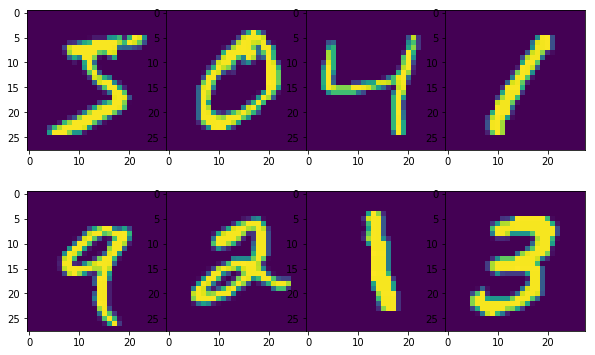

In [20]:
first_8_images = train_images[:8]
resized = np.reshape(first_8_images, (-1,28,28))
print('First 8 images of train set:')
show_first_8(resized)


## Find best k parameter

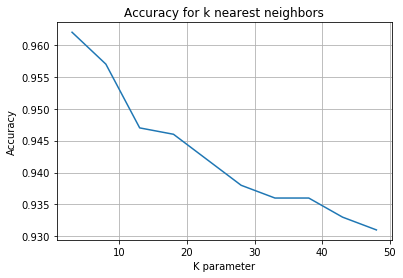

In [21]:
k_values = [i for i in range(3, 50, 5)]

best_k, accuracies = select_knn_model(validation_images, validation_labels, train_images, train_labels, k_values,
                                      distance_function=get_euclidean_distance)

plt.plot(k_values, accuracies)
plt.xlabel('K parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy for k nearest neighbors')
plt.grid()
plt.show()



In [ ]:
10 --- 30 90 90 30 60 30 30

In [22]:
prediction = np.squeeze(predict(test_images, train_images, train_labels, best_k, get_euclidean_distance))

accuracy = count_accuracy(prediction, test_labels)

print("Accuracy on test set for best k={}: {:2}%".format(best_k, accuracy * 100))


Accuracy on test set for best k=3: 96.1%


# Sources

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm - first visualisation image

https://en.wikipedia.org/wiki/Euclidean_distance - euclidean distance visualisation

https://rajritvikblog.wordpress.com/2017/06/29/iris-dataset-analysis-python/ - first iris image

https://rpubs.com/wjholst/322258 - second iris image

https://www.kaggle.com/pablotab/mnistpklgz - mnist dataset
